In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="gH4DnlLg4Gi5fnlGzCMa")
project = rf.workspace("ml-pzfty").project("chv-dataset")
version = project.version(1)
dataset = version.download("yolov12")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 93.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to chv-DATASET-1 in yolov12:: 100%|██████████| 6928/6928 [00:02<00:00, 3359.50it/s]


In [4]:
# Connect the Colab notebook to Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
!pip install ultralytics

from ultralytics import YOLO

import torch
import torch.nn as nn


# 모델 YAML 파일 경로
model_yaml_path = "/content/drive/MyDrive/Capstone/yolo.yaml"  # 사용자가 제공한 yaml 파일 경로

# YAML 파일을 기반으로 YOLO 모델 불러오기
model = YOLO(model_yaml_path)

# 모델 정보 출력
model.info()

# YOLO 모델 학습
results = model.train(
    data="/content/chv-DATASET-1/data.yaml",
    epochs=10000000,
    imgsz=640,
    batch=50,
    patience=50,
    name='CHV-dataset',
    save=True,
    save_period=-1,            # ✅ 매 epoch 저장 X
)

WARNING ⚠️ no model scale passed. Assuming scale='n'.
YOLO summary: 181 layers, 2,590,035 parameters, 2,590,019 gradients, 6.4 GFLOPs
Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Capstone/yolo.yaml, data=/content/chv-DATASET-1/data.yaml, epochs=10000000, time=None, patience=50, batch=50, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=CHV-dataset, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes

100%|██████████| 755k/755k [00:00<00:00, 21.3MB/s]


Overriding model.yaml nc=1 with nc=3
WARNING ⚠️ no model scale passed. Assuming scale='n'.

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]        

100%|██████████| 5.35M/5.35M [00:00<00:00, 95.5MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 108.9±124.3 MB/s, size: 131.4 KB)


train: Scanning /content/chv-DATASET-1/train/labels... 3192 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3192/3192 [00:06<00:00, 487.15it/s]

train: New cache created: /content/chv-DATASET-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 18.6±13.8 MB/s, size: 51.3 KB)


val: Scanning /content/chv-DATASET-1/valid/labels... 133 images, 0 backgrounds, 0 corrupt: 100%|██████████| 133/133 [00:00<00:00, 382.60it/s]

val: New cache created: /content/chv-DATASET-1/valid/labels.cache


Plotting labels to runs/detect/CHV-dataset/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.000390625), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/CHV-dataset
Starting training for 10000000 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


 1/10000000      8.95G       3.96      4.119      4.242        396        640: 100%|██████████| 64/64 [01:00<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.19s/it]

                   all        133        894     0.0021      0.118    0.00198   0.000511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


 2/10000000      8.51G      3.638      3.791      3.988        455        640: 100%|██████████| 64/64 [00:55<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.48s/it]

                   all        133        894     0.0254      0.321     0.0222    0.00496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


 3/10000000      8.96G      2.925      3.248      3.267        462        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.26s/it]

                   all        133        894      0.119       0.11     0.0515     0.0172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


 4/10000000        10G       2.52      2.773      2.751        454        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.28s/it]

                   all        133        894       0.24      0.195      0.156     0.0543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


 5/10000000      7.96G      2.213      2.324      2.416        550        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]

                   all        133        894      0.379      0.352      0.308      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


 6/10000000      8.37G      2.019      2.034      2.212        442        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.31s/it]

                   all        133        894      0.568      0.489      0.492       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


 7/10000000      7.25G      1.899      1.866      2.092        455        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.08s/it]

                   all        133        894      0.702      0.532      0.623      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


 8/10000000      8.38G       1.84      1.742      2.009        480        640: 100%|██████████| 64/64 [00:57<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.00it/s]

                   all        133        894      0.792      0.606      0.694      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


 9/10000000       8.7G        1.8      1.656      1.949        489        640: 100%|██████████| 64/64 [00:57<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

                   all        133        894      0.665      0.652      0.666      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


10/10000000      8.07G      1.762       1.58        1.9        488        640: 100%|██████████| 64/64 [00:57<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]

                   all        133        894      0.768      0.629      0.725       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


11/10000000      8.18G       1.73      1.536      1.873        476        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.42s/it]

                   all        133        894      0.783      0.695      0.753      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


12/10000000      7.43G      1.708      1.486      1.835        513        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.03it/s]

                   all        133        894      0.794      0.674      0.757       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


13/10000000      8.38G      1.692      1.448      1.815        392        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.00s/it]

                   all        133        894      0.808       0.67      0.772      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


14/10000000      8.55G       1.66      1.407      1.801        379        640: 100%|██████████| 64/64 [00:56<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.07s/it]

                   all        133        894      0.776      0.689      0.758      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


15/10000000      7.83G      1.641      1.371      1.786        575        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.51s/it]

                   all        133        894      0.829      0.691      0.789      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


16/10000000       8.1G      1.621      1.337      1.762        600        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.01s/it]

                   all        133        894      0.805      0.729      0.802      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


17/10000000      8.16G      1.618       1.32      1.735        470        640: 100%|██████████| 64/64 [00:57<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.10it/s]

                   all        133        894       0.82      0.714      0.803      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


18/10000000      7.59G      1.605      1.302      1.733        526        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.02s/it]

                   all        133        894       0.86      0.711      0.816       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


19/10000000       8.1G      1.588      1.278      1.711        428        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.04s/it]

                   all        133        894      0.835      0.739      0.829       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


20/10000000      8.91G      1.574      1.252      1.695        480        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]

                   all        133        894      0.826      0.726      0.809      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


21/10000000      7.62G      1.569      1.249      1.694        457        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]

                   all        133        894      0.826      0.741      0.831      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


22/10000000      8.09G      1.551       1.21      1.678        423        640: 100%|██████████| 64/64 [00:55<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all        133        894      0.825      0.707      0.801      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


23/10000000      8.12G      1.547      1.196      1.663        515        640: 100%|██████████| 64/64 [00:55<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]

                   all        133        894      0.845      0.753      0.833      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


24/10000000      7.54G      1.541      1.196      1.663        408        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.27s/it]

                   all        133        894      0.858      0.752      0.826      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


25/10000000      7.83G      1.524      1.172      1.644        553        640: 100%|██████████| 64/64 [00:54<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.29s/it]

                   all        133        894      0.861      0.745      0.845      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


26/10000000      8.23G      1.525      1.167       1.64        482        640: 100%|██████████| 64/64 [00:56<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all        133        894      0.843      0.751      0.849       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


27/10000000      7.81G       1.52       1.16      1.646        501        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all        133        894      0.874      0.747      0.856      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


28/10000000      7.83G        1.5      1.149      1.624        405        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all        133        894      0.842      0.769      0.845      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


29/10000000      8.56G      1.505      1.134      1.626        528        640: 100%|██████████| 64/64 [00:55<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.01it/s]

                   all        133        894      0.846      0.792      0.864       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


30/10000000      8.66G      1.489      1.109      1.617        564        640: 100%|██████████| 64/64 [00:55<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.33s/it]

                   all        133        894      0.871      0.779      0.851      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


31/10000000       8.1G      1.497       1.12      1.604        477        640: 100%|██████████| 64/64 [00:55<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all        133        894      0.864       0.79      0.867      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


32/10000000      9.11G       1.49      1.108      1.602        485        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all        133        894      0.869        0.8      0.873      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


33/10000000      7.99G      1.484      1.092      1.587        459        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all        133        894      0.869      0.766      0.869      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


34/10000000      8.02G      1.463       1.07       1.58        451        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all        133        894      0.859      0.801      0.866      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


35/10000000      7.95G       1.47      1.079      1.595        472        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

                   all        133        894      0.867      0.783      0.876      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


36/10000000       8.2G      1.474      1.082      1.579        408        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.26s/it]

                   all        133        894      0.866      0.794      0.873      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


37/10000000      8.17G      1.459      1.061      1.572        431        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.08s/it]

                   all        133        894      0.886      0.778       0.87       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


38/10000000       7.8G       1.44      1.039      1.552        457        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]

                   all        133        894      0.887        0.8      0.882      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


39/10000000      7.82G      1.457      1.057      1.569        531        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all        133        894      0.879      0.789      0.873      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


40/10000000      7.61G      1.449      1.037      1.559        406        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all        133        894      0.911       0.76      0.872      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


41/10000000      7.41G      1.438      1.032      1.545        435        640: 100%|██████████| 64/64 [00:55<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.17it/s]

                   all        133        894       0.87      0.789      0.872      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


42/10000000      7.51G      1.428       1.03      1.551        460        640: 100%|██████████| 64/64 [00:55<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.01s/it]

                   all        133        894      0.895      0.815      0.885      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


43/10000000      8.25G      1.438      1.018      1.547        416        640: 100%|██████████| 64/64 [00:54<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.43s/it]

                   all        133        894      0.904      0.771      0.872      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


44/10000000      8.81G      1.433      1.017       1.54        471        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all        133        894      0.879      0.801      0.872      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


45/10000000      7.45G      1.418      1.009      1.531        560        640: 100%|██████████| 64/64 [00:55<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all        133        894      0.882      0.788      0.869      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


46/10000000      8.23G      1.427      1.011      1.542        465        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all        133        894       0.85      0.835      0.879      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


47/10000000      7.88G      1.422     0.9908       1.53        421        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s]

                   all        133        894      0.878      0.793      0.875      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


48/10000000      8.29G      1.407     0.9875      1.518        536        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.07s/it]

                   all        133        894      0.897       0.81      0.888      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


49/10000000      8.59G      1.406     0.9836      1.522        444        640: 100%|██████████| 64/64 [00:55<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.06s/it]

                   all        133        894      0.878      0.781       0.87      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


50/10000000      7.66G      1.413     0.9815      1.525        464        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all        133        894      0.866      0.812      0.876      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


51/10000000       7.3G      1.394     0.9732      1.515        509        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.02s/it]

                   all        133        894      0.886      0.788      0.864      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


52/10000000      7.94G      1.398     0.9749      1.509        502        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all        133        894      0.889      0.807      0.877      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


53/10000000      8.65G      1.396     0.9656      1.512        434        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.09s/it]

                   all        133        894        0.9      0.793      0.883      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


54/10000000      7.97G      1.378     0.9486      1.505        367        640: 100%|██████████| 64/64 [00:55<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.40s/it]

                   all        133        894      0.861      0.839      0.887      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


55/10000000      8.64G      1.384     0.9522      1.503        470        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

                   all        133        894      0.886      0.789      0.865      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


56/10000000      7.32G       1.39     0.9629      1.502        562        640: 100%|██████████| 64/64 [00:55<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]

                   all        133        894       0.88      0.811      0.884      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


57/10000000      7.84G      1.379     0.9471      1.488        449        640: 100%|██████████| 64/64 [00:55<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

                   all        133        894       0.87      0.803      0.873      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


58/10000000      7.92G      1.372     0.9428      1.487        498        640: 100%|██████████| 64/64 [00:55<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all        133        894      0.876      0.833      0.893      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


59/10000000      8.23G      1.382     0.9473       1.49        475        640: 100%|██████████| 64/64 [00:55<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all        133        894       0.87      0.811      0.876       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


60/10000000      9.17G      1.361     0.9307      1.478        542        640: 100%|██████████| 64/64 [00:55<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.03it/s]

                   all        133        894      0.906      0.806      0.886      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


61/10000000      8.15G       1.37     0.9313      1.484        552        640: 100%|██████████| 64/64 [00:55<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.46s/it]

                   all        133        894      0.924      0.794      0.892      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


62/10000000      7.97G       1.37     0.9258      1.472        533        640: 100%|██████████| 64/64 [00:55<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.10s/it]

                   all        133        894      0.904        0.8      0.884        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


63/10000000      7.91G      1.354     0.9201       1.47        456        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all        133        894      0.871       0.83      0.891      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


64/10000000      8.27G      1.361     0.9198       1.47        438        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

                   all        133        894      0.893      0.776      0.872      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


65/10000000       8.6G      1.355     0.9149      1.472        539        640: 100%|██████████| 64/64 [00:55<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all        133        894      0.871      0.813      0.874       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


66/10000000      7.66G      1.356     0.9089      1.464        391        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.03it/s]

                   all        133        894      0.886      0.824       0.89      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


67/10000000      8.12G      1.352     0.9068      1.466        446        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

                   all        133        894      0.899      0.798      0.879      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


68/10000000      8.85G      1.349     0.9146      1.462        369        640: 100%|██████████| 64/64 [00:54<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.30s/it]

                   all        133        894      0.892      0.824       0.89      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


69/10000000      8.85G      1.339     0.8964      1.446        693        640: 100%|██████████| 64/64 [00:55<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]

                   all        133        894      0.924      0.798      0.893      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


70/10000000      8.38G      1.341     0.8995      1.452        500        640: 100%|██████████| 64/64 [00:55<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.01s/it]

                   all        133        894      0.902      0.816      0.889      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


71/10000000      8.88G      1.334     0.8874      1.445        553        640: 100%|██████████| 64/64 [00:55<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all        133        894      0.895      0.818      0.891      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


72/10000000      7.74G      1.328     0.8958      1.445        425        640: 100%|██████████| 64/64 [00:54<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]

                   all        133        894      0.881      0.834      0.893      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


73/10000000      8.37G      1.333     0.8937      1.448        356        640: 100%|██████████| 64/64 [00:55<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

                   all        133        894      0.914      0.811      0.894      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


74/10000000      7.65G      1.343     0.8982      1.452        339        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]

                   all        133        894      0.902      0.818       0.89        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


75/10000000      8.11G      1.337     0.8988      1.451        385        640: 100%|██████████| 64/64 [00:55<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.01it/s]

                   all        133        894      0.905      0.825      0.896      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


76/10000000      7.69G      1.321     0.8735       1.44        480        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.28s/it]

                   all        133        894      0.914      0.834      0.897      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


77/10000000      9.16G      1.335     0.8908      1.443        485        640: 100%|██████████| 64/64 [00:55<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]

                   all        133        894       0.89      0.839      0.897       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


78/10000000       8.2G      1.319     0.8763      1.429        493        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.03it/s]

                   all        133        894      0.916      0.837      0.897      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


79/10000000      8.73G      1.318       0.87       1.43        471        640: 100%|██████████| 64/64 [00:56<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]

                   all        133        894      0.892      0.821      0.889        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


80/10000000      8.03G      1.296       0.86      1.428        408        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.00s/it]

                   all        133        894       0.91      0.824      0.892      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


81/10000000      9.04G      1.314     0.8727      1.419        606        640: 100%|██████████| 64/64 [00:56<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all        133        894      0.895      0.825      0.894      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


82/10000000      8.78G       1.31     0.8575      1.412        423        640: 100%|██████████| 64/64 [00:55<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]

                   all        133        894      0.882      0.845      0.892      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


83/10000000      8.78G      1.307     0.8506      1.411        434        640: 100%|██████████| 64/64 [00:54<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.38s/it]

                   all        133        894      0.895      0.818      0.894      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


84/10000000      7.86G      1.298     0.8528      1.411        475        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

                   all        133        894      0.896      0.839      0.899      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


85/10000000      7.99G      1.298     0.8543      1.412        436        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]

                   all        133        894      0.888       0.85      0.897      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


86/10000000       7.7G      1.313     0.8615      1.413        534        640: 100%|██████████| 64/64 [00:56<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]

                   all        133        894      0.907      0.846      0.904      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


87/10000000      8.09G      1.291     0.8475      1.402        468        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]

                   all        133        894      0.903      0.829        0.9      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


88/10000000      7.71G      1.291      0.846      1.407        483        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.34s/it]

                   all        133        894      0.902      0.829      0.898      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


89/10000000      8.05G      1.298     0.8393        1.4        405        640: 100%|██████████| 64/64 [00:55<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.06s/it]

                   all        133        894        0.9      0.846        0.9      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


90/10000000      7.95G      1.291     0.8389      1.401        387        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]

                   all        133        894      0.889      0.848      0.895      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


91/10000000      7.28G      1.276     0.8335      1.398        532        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]

                   all        133        894      0.889      0.846      0.893      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


92/10000000       7.9G      1.285     0.8308      1.387        465        640: 100%|██████████| 64/64 [00:55<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all        133        894      0.912      0.841      0.903      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


93/10000000      7.23G       1.28     0.8262      1.397        510        640: 100%|██████████| 64/64 [00:55<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        133        894      0.889      0.847      0.897      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


94/10000000      7.67G      1.273     0.8308      1.395        391        640: 100%|██████████| 64/64 [00:55<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]

                   all        133        894       0.92      0.829      0.894      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


95/10000000      7.83G      1.283     0.8293       1.39        442        640: 100%|██████████| 64/64 [00:55<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.36s/it]

                   all        133        894      0.913      0.843      0.897      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


96/10000000       8.2G      1.277     0.8332      1.398        443        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.15it/s]

                   all        133        894      0.907      0.835      0.899       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


97/10000000      7.62G      1.277     0.8256      1.395        383        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.17it/s]

                   all        133        894      0.915      0.818      0.888      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


98/10000000      8.02G       1.28     0.8261      1.394        548        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]

                   all        133        894      0.892      0.851      0.901      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


99/10000000      7.95G      1.262     0.8195      1.381        467        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]

                   all        133        894      0.913       0.82      0.895      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


100/10000000      8.77G      1.269     0.8137      1.371        414        640: 100%|██████████| 64/64 [00:57<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.01s/it]

                   all        133        894      0.918      0.817        0.9      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


101/10000000      7.18G      1.262     0.8199      1.382        397        640: 100%|██████████| 64/64 [00:56<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.33s/it]

                   all        133        894      0.894      0.864      0.904       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


102/10000000      8.72G      1.253     0.8009      1.372        427        640: 100%|██████████| 64/64 [00:57<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]

                   all        133        894      0.924      0.825      0.903       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


103/10000000      7.44G      1.258     0.8149      1.378        418        640: 100%|██████████| 64/64 [00:57<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all        133        894      0.928      0.832      0.907      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


104/10000000      7.71G      1.266     0.8111      1.379        460        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all        133        894      0.898      0.849      0.901       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


105/10000000      8.18G      1.253     0.8033      1.365        478        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.35s/it]

                   all        133        894      0.905       0.82      0.886      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


106/10000000      8.75G      1.259      0.805      1.364        436        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]

                   all        133        894      0.917      0.829      0.898      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


107/10000000      7.43G      1.256     0.7986       1.36        481        640: 100%|██████████| 64/64 [00:55<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]

                   all        133        894      0.918      0.846      0.901      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


108/10000000      8.81G      1.248     0.8058      1.362        559        640: 100%|██████████| 64/64 [00:55<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.10it/s]

                   all        133        894      0.914       0.85      0.904      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


109/10000000      7.81G      1.255     0.8007      1.369        443        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all        133        894      0.912      0.845      0.908       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


110/10000000       7.4G      1.243     0.7976      1.358        460        640: 100%|██████████| 64/64 [00:55<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.10s/it]

                   all        133        894      0.902      0.853      0.905      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


111/10000000      7.75G      1.242     0.7942      1.357        479        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.26s/it]

                   all        133        894      0.902      0.856      0.901      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


112/10000000      7.84G      1.247     0.7982      1.366        450        640: 100%|██████████| 64/64 [00:55<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]

                   all        133        894      0.924      0.833       0.91      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


113/10000000      7.44G      1.247     0.7911      1.353        388        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all        133        894       0.91      0.868      0.906      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


114/10000000      8.73G       1.23     0.7881      1.346        487        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.01s/it]

                   all        133        894      0.901      0.869      0.906      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


115/10000000      8.82G      1.248     0.7954      1.356        414        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all        133        894      0.899      0.862      0.904      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


116/10000000      8.12G      1.224     0.7774      1.346        489        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]

                   all        133        894      0.914      0.854      0.908      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


117/10000000      8.07G      1.225     0.7783      1.347        479        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.45s/it]

                   all        133        894      0.911      0.864       0.91      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


118/10000000      7.54G      1.225     0.7777       1.35        407        640: 100%|██████████| 64/64 [00:55<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.28it/s]

                   all        133        894      0.891      0.872      0.903      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


119/10000000      8.22G      1.219     0.7702      1.337        575        640: 100%|██████████| 64/64 [00:56<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all        133        894      0.919      0.842      0.903      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


120/10000000      7.97G      1.223     0.7783      1.338        470        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]

                   all        133        894      0.919      0.843      0.909      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


121/10000000      8.35G      1.226     0.7787       1.34        483        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]

                   all        133        894      0.922      0.848      0.905      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


122/10000000      8.34G      1.207     0.7613       1.33        556        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.10it/s]

                   all        133        894      0.915      0.857      0.904      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


123/10000000      8.63G      1.207     0.7651      1.332        378        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.34s/it]

                   all        133        894      0.924       0.83        0.9      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


124/10000000      8.09G      1.212     0.7644      1.338        461        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all        133        894      0.904      0.857      0.903      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


125/10000000      8.04G      1.223     0.7799      1.334        559        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

                   all        133        894      0.891      0.868      0.904      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


126/10000000      8.81G      1.212     0.7648      1.334        420        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.10it/s]

                   all        133        894      0.898      0.863      0.904      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


127/10000000      8.29G      1.207     0.7635      1.328        485        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s]

                   all        133        894      0.903      0.852      0.901      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


128/10000000      8.01G      1.213     0.7701      1.342        499        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.31s/it]

                   all        133        894      0.919      0.843        0.9      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


129/10000000      8.03G      1.213     0.7608      1.326        556        640: 100%|██████████| 64/64 [00:55<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.05s/it]

                   all        133        894      0.914      0.845      0.904      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


130/10000000       7.6G        1.2     0.7551      1.323        555        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.17it/s]

                   all        133        894      0.892      0.865      0.908      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


131/10000000      7.61G      1.203     0.7624      1.326        479        640: 100%|██████████| 64/64 [00:56<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.02s/it]

                   all        133        894      0.896      0.854      0.906      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


132/10000000      7.29G      1.199     0.7544      1.325        446        640: 100%|██████████| 64/64 [00:56<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

                   all        133        894      0.911      0.843      0.904      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


133/10000000      8.19G      1.192     0.7545      1.318        535        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.34s/it]

                   all        133        894      0.909      0.849      0.903      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


134/10000000      7.47G      1.197     0.7497      1.316        505        640: 100%|██████████| 64/64 [00:55<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

                   all        133        894      0.882      0.871      0.898      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


135/10000000      7.56G      1.204     0.7596      1.318        545        640: 100%|██████████| 64/64 [00:56<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all        133        894      0.895      0.851      0.901      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


136/10000000      8.06G      1.184     0.7448      1.316        427        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all        133        894      0.918      0.833      0.899      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


137/10000000      8.41G      1.192     0.7462      1.318        524        640: 100%|██████████| 64/64 [00:56<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all        133        894      0.905      0.858        0.9      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


138/10000000      8.04G      1.181     0.7433       1.31        413        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]

                   all        133        894      0.918      0.848        0.9      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


139/10000000      8.32G      1.183     0.7449      1.313        484        640: 100%|██████████| 64/64 [00:55<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.35s/it]

                   all        133        894       0.91      0.852      0.897      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


140/10000000      7.58G      1.187     0.7448      1.314        481        640: 100%|██████████| 64/64 [00:55<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.02s/it]

                   all        133        894      0.895      0.862      0.893       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


141/10000000       7.4G      1.188     0.7409       1.31        462        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all        133        894      0.921      0.836      0.899      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


142/10000000      8.14G       1.18      0.738      1.311        505        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.01it/s]

                   all        133        894      0.894      0.869      0.902      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


143/10000000      7.75G      1.179     0.7374       1.31        464        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.29it/s]

                   all        133        894      0.898      0.851      0.898      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


144/10000000      8.24G      1.173      0.736      1.301        368        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.00it/s]

                   all        133        894      0.903      0.846      0.894      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


145/10000000      7.54G      1.181     0.7403       1.31        459        640: 100%|██████████| 64/64 [00:55<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.40s/it]

                   all        133        894      0.899      0.858      0.899      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


146/10000000      7.63G      1.172     0.7346      1.299        483        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]

                   all        133        894      0.899      0.866      0.899      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


147/10000000      8.41G      1.172     0.7337      1.295        432        640: 100%|██████████| 64/64 [00:55<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]

                   all        133        894      0.893      0.869        0.9      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


148/10000000      7.69G      1.167     0.7322        1.3        546        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.26it/s]

                   all        133        894      0.899      0.868      0.901      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


149/10000000      7.92G      1.165     0.7323      1.292        436        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s]

                   all        133        894        0.9      0.871      0.898      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


150/10000000      7.72G      1.169     0.7289      1.298        498        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.23s/it]

                   all        133        894      0.908      0.868      0.902      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


151/10000000      8.68G      1.166     0.7325      1.301        465        640: 100%|██████████| 64/64 [00:55<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.08s/it]

                   all        133        894      0.912      0.871      0.902      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


152/10000000      8.77G       1.16      0.726      1.291        411        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.09s/it]

                   all        133        894      0.928      0.854      0.901      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


153/10000000      7.95G      1.163     0.7273      1.296        412        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.17it/s]

                   all        133        894      0.908      0.857      0.901      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


154/10000000      8.28G      1.165     0.7234      1.292        424        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all        133        894      0.908       0.86      0.899      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


155/10000000      8.09G      1.155     0.7172      1.284        466        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.36s/it]

                   all        133        894      0.893       0.87      0.901      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


156/10000000      8.34G      1.147     0.7164      1.287        490        640: 100%|██████████| 64/64 [00:56<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.16it/s]

                   all        133        894      0.903       0.85      0.901      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


157/10000000      7.59G      1.156      0.723      1.294        453        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s]

                   all        133        894      0.902       0.86      0.906      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


158/10000000      8.26G      1.151     0.7126      1.281        406        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.08s/it]

                   all        133        894      0.894      0.861      0.901      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


159/10000000      7.61G      1.161     0.7225      1.287        349        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.17it/s]

                   all        133        894      0.892      0.867        0.9      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


160/10000000      7.93G      1.156     0.7242      1.284        390        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.16it/s]

                   all        133        894       0.91      0.845      0.901      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


161/10000000      9.25G      1.148     0.7101      1.273        490        640: 100%|██████████| 64/64 [00:57<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]

                   all        133        894      0.892      0.869      0.901      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


162/10000000      8.27G      1.148     0.7185      1.281        419        640: 100%|██████████| 64/64 [00:58<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.10it/s]

                   all        133        894      0.894       0.87      0.904      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


163/10000000      7.76G      1.141     0.7109      1.275        517        640: 100%|██████████| 64/64 [00:57<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]

                   all        133        894      0.918      0.836      0.902      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


164/10000000      7.76G      1.151      0.714      1.275        438        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.03it/s]

                   all        133        894      0.898      0.858      0.902      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


165/10000000      8.62G      1.141      0.706      1.279        523        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]

                   all        133        894      0.913       0.84      0.898      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


166/10000000      7.87G      1.139     0.7065      1.271        425        640: 100%|██████████| 64/64 [00:56<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all        133        894      0.927      0.832      0.899      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


167/10000000      7.85G      1.147     0.7137      1.279        488        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]

                   all        133        894      0.917      0.842        0.9      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


168/10000000      7.29G      1.145     0.7094      1.277        450        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all        133        894      0.909      0.855      0.903      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


169/10000000      8.21G      1.128     0.7006      1.267        489        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all        133        894      0.902      0.856      0.902      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


170/10000000       7.7G      1.134     0.7023      1.267        387        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.06s/it]

                   all        133        894       0.91      0.851      0.897      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


171/10000000      8.61G      1.129     0.7079      1.273        429        640: 100%|██████████| 64/64 [00:55<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.50s/it]

                   all        133        894      0.902      0.865      0.902      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


172/10000000      7.66G      1.133      0.699      1.266        451        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.15it/s]

                   all        133        894      0.896      0.865        0.9      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


173/10000000      7.85G      1.132     0.7062      1.268        470        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

                   all        133        894      0.899       0.86        0.9      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


174/10000000      8.01G      1.139     0.7028       1.26        434        640: 100%|██████████| 64/64 [00:56<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all        133        894      0.896      0.864      0.896      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


175/10000000      7.71G      1.118     0.6976      1.255        487        640: 100%|██████████| 64/64 [00:56<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.06s/it]

                   all        133        894      0.898      0.868      0.895      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


176/10000000      8.15G      1.133     0.7054      1.263        536        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.40s/it]

                   all        133        894      0.892      0.871      0.899      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


177/10000000      8.29G      1.132     0.7007      1.262        395        640: 100%|██████████| 64/64 [00:56<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.01s/it]

                   all        133        894      0.894      0.871      0.898      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


178/10000000      8.11G       1.13     0.7015      1.259        461        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all        133        894      0.888      0.869      0.898      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


179/10000000      8.01G      1.118     0.6917      1.248        409        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]

                   all        133        894      0.895      0.864        0.9       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


180/10000000      8.11G      1.115     0.6913      1.254        445        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.15it/s]

                   all        133        894       0.89      0.864        0.9      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


181/10000000      8.54G      1.116     0.6907      1.252        399        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.24s/it]

                   all        133        894      0.908      0.854      0.902      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


182/10000000      8.06G      1.104     0.6865      1.243        506        640: 100%|██████████| 64/64 [00:58<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all        133        894      0.895      0.868      0.904      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


183/10000000      7.65G      1.114     0.6882      1.247        468        640: 100%|██████████| 64/64 [00:57<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.02s/it]

                   all        133        894      0.886      0.876      0.903      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


184/10000000      8.08G      1.116     0.6908      1.251        495        640: 100%|██████████| 64/64 [00:57<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]

                   all        133        894      0.886       0.88      0.904      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


185/10000000      7.96G      1.111     0.6876      1.247        384        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.31s/it]

                   all        133        894        0.9      0.867      0.901      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


186/10000000      7.71G      1.124     0.6914      1.253        360        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.15it/s]

                   all        133        894      0.896      0.868      0.902      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


187/10000000      8.46G      1.108     0.6844      1.243        446        640: 100%|██████████| 64/64 [00:56<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]

                   all        133        894        0.9      0.863        0.9      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


188/10000000      8.39G      1.092     0.6728      1.244        386        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.16it/s]

                   all        133        894        0.9      0.863      0.901      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


189/10000000      7.36G      1.114     0.6871      1.249        556        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.37s/it]

                   all        133        894      0.898      0.862      0.901      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


190/10000000      7.49G      1.102     0.6792       1.24        465        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all        133        894      0.897      0.862      0.899       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


191/10000000       7.8G      1.113     0.6861       1.24        520        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]

                   all        133        894      0.896      0.863      0.898      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


192/10000000      7.77G      1.102      0.689      1.252        489        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]

                   all        133        894      0.896      0.862      0.898      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


193/10000000      8.04G      1.112     0.6911      1.243        579        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all        133        894      0.895      0.865      0.899      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


194/10000000      7.94G      1.097     0.6789      1.246        442        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.39s/it]

                   all        133        894      0.902      0.858      0.899      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


195/10000000      8.28G      1.097     0.6854      1.237        554        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all        133        894      0.904      0.858      0.899      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


196/10000000      8.32G      1.093     0.6737      1.235        436        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

                   all        133        894      0.896      0.864        0.9      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


197/10000000      7.82G      1.098     0.6762      1.237        429        640: 100%|██████████| 64/64 [00:57<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.10it/s]

                   all        133        894      0.888      0.869      0.901      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


198/10000000       7.9G      1.108     0.6805      1.238        543        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]

                   all        133        894      0.888       0.87        0.9      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


199/10000000      7.31G      1.091     0.6731      1.235        506        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.40s/it]

                   all        133        894      0.886      0.874      0.899      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


200/10000000      8.46G      1.089     0.6753      1.233        392        640: 100%|██████████| 64/64 [00:57<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all        133        894      0.893      0.873      0.902      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


201/10000000      8.72G      1.086     0.6757      1.235        406        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

                   all        133        894      0.894      0.873      0.901      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


202/10000000         8G      1.092     0.6737      1.233        429        640: 100%|██████████| 64/64 [00:56<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]

                   all        133        894      0.906      0.859      0.901      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


203/10000000      7.54G      1.098     0.6749      1.226        521        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]

                   all        133        894      0.917      0.855        0.9      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


204/10000000      8.46G      1.087      0.677      1.229        593        640: 100%|██████████| 64/64 [00:56<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]

                   all        133        894       0.92      0.856        0.9      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


205/10000000      7.69G       1.09     0.6726       1.23        461        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]

                   all        133        894      0.903      0.863      0.899      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


206/10000000      7.72G      1.096     0.6714      1.227        602        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]

                   all        133        894      0.908      0.856      0.899      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


207/10000000      7.41G      1.083     0.6707      1.227        383        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all        133        894      0.898      0.866      0.896      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


208/10000000      8.36G      1.091     0.6683      1.225        364        640: 100%|██████████| 64/64 [00:57<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]

                   all        133        894      0.901      0.863      0.894      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


209/10000000      8.18G      1.078     0.6661      1.224        486        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.37s/it]

                   all        133        894      0.902      0.863      0.894      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


210/10000000      8.46G      1.085     0.6643      1.226        467        640: 100%|██████████| 64/64 [00:55<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.03it/s]

                   all        133        894        0.9      0.866      0.894      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


211/10000000      7.97G      1.069     0.6639      1.225        393        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]

                   all        133        894      0.898      0.865      0.893      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


212/10000000       8.4G      1.074     0.6651      1.222        413        640: 100%|██████████| 64/64 [00:57<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all        133        894      0.897      0.866      0.894      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


213/10000000      8.54G      1.074     0.6607      1.212        494        640: 100%|██████████| 64/64 [00:57<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all        133        894      0.902      0.862      0.896      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


214/10000000      8.55G      1.088     0.6654      1.224        375        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]

                   all        133        894      0.903      0.856      0.895      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


215/10000000      8.62G      1.077     0.6621      1.216        555        640: 100%|██████████| 64/64 [00:55<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.28s/it]

                   all        133        894      0.906      0.854      0.896      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


216/10000000      7.72G      1.076     0.6606      1.218        568        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all        133        894      0.908      0.851      0.896      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


217/10000000      7.87G      1.074     0.6582      1.213        443        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all        133        894      0.911      0.848      0.896      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


218/10000000      8.51G      1.069     0.6559      1.212        523        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.10it/s]

                   all        133        894      0.912      0.848      0.896      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


219/10000000      8.35G      1.066     0.6602      1.212        485        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.26it/s]

                   all        133        894      0.909      0.852      0.896      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


220/10000000      8.03G      1.066      0.657      1.213        437        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]

                   all        133        894      0.911       0.85      0.896      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


221/10000000       7.7G      1.063     0.6523      1.205        458        640: 100%|██████████| 64/64 [00:55<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]

                   all        133        894      0.915      0.851      0.897      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


222/10000000      7.99G      1.057     0.6511      1.203        506        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]

                   all        133        894      0.916      0.853      0.898       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


223/10000000      7.42G      1.061     0.6513      1.213        496        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.16it/s]

                   all        133        894      0.916      0.853      0.898      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


224/10000000      7.46G      1.058     0.6505      1.209        436        640: 100%|██████████| 64/64 [00:56<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all        133        894      0.911      0.854      0.898      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


225/10000000      8.95G      1.067     0.6509      1.207        563        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all        133        894      0.912      0.856      0.899       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


226/10000000      7.68G      1.057     0.6478      1.206        518        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        133        894       0.91      0.857        0.9       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


227/10000000      8.66G      1.063     0.6506      1.208        501        640: 100%|██████████| 64/64 [00:57<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.39s/it]

                   all        133        894      0.905      0.856      0.899       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


228/10000000      8.27G      1.046     0.6422      1.203        451        640: 100%|██████████| 64/64 [00:57<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all        133        894      0.902      0.857      0.899       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


229/10000000      7.87G      1.063     0.6563      1.208        543        640: 100%|██████████| 64/64 [00:58<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all        133        894      0.904      0.857        0.9       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


230/10000000      8.45G      1.064     0.6507      1.207        525        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

                   all        133        894      0.904      0.857        0.9      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


231/10000000      8.64G      1.057     0.6509      1.204        461        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.03it/s]

                   all        133        894      0.904      0.856        0.9      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


232/10000000       8.5G      1.052     0.6453      1.205        405        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.27s/it]

                   all        133        894      0.904      0.853        0.9      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


233/10000000      8.15G      1.061     0.6606       1.21        475        640: 100%|██████████| 64/64 [00:55<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.28s/it]

                   all        133        894      0.902      0.853      0.899      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


234/10000000      8.08G      1.045     0.6387      1.198        530        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.17it/s]

                   all        133        894      0.903      0.853        0.9      0.513
EarlyStopping: Training stopped early as no improvement observed in last 50 epochs. Best results observed at epoch 184, best model saved as best.pt.
To update EarlyStopping(patience=50) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



234 epochs completed in 3.903 hours.
Optimizer stripped from runs/detect/CHV-dataset/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/CHV-dataset/weights/best.pt, 5.5MB

Validating runs/detect/CHV-dataset/weights/best.pt...
Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]


                   all        133        894      0.894      0.874      0.905      0.522
                     0        133        398       0.91      0.818      0.884      0.506
                     1         60        153      0.863      0.904      0.899      0.533
                     2        129        343      0.909        0.9       0.93      0.526
Speed: 0.2ms preprocess, 2.5ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/CHV-dataset


In [8]:
import shutil
from google.colab import files

# 1. 압축
shutil.make_archive('test_results', 'zip', '/content/runs')

# 2. 다운로드
files.download('test_results.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
# 📌 1. 필요 라이브러리 설치
!pip install -q ultralytics matplotlib opencv-python

# 📌 2. 라이브러리 임포트
from ultralytics import YOLO
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import precision_recall_curve, average_precision_score

# 📌 3. 모델 로드 (본인 모델 경로로 수정)
model = YOLO("/content/runs/detect/CHV-dataset/weights/best.pt")

# 📌 4. 테스트 이미지 추론 (confidence 낮게 설정해 많이 뽑기)
results = model.predict(source="/content/chv-DATASET-1/test/images/", save=False, stream=True, conf=0.001)

# 📌 5. GT 및 Pred 추출
pred_boxes = []
gt_boxes = []
all_scores = []
all_labels = []

label_dir = "/content/chv-DATASET-1/test/labels"

for r in results:
    image_path = r.path
    image_name = os.path.basename(image_path).split('.')[0]

    # ✅ 예측 박스
    preds = r.boxes.data.cpu().numpy()  # [cls, conf, x1, y1, x2, y2]
    pred_boxes_xyxy = preds[:, 2:] if len(preds) else np.zeros((0, 4))
    pred_scores = preds[:, 1] if len(preds) else []

    # ✅ GT 박스
    label_path = os.path.join(label_dir, f"{image_name}.txt")
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            gt = []
            for line in f:
                cls, x, y, w, h = map(float, line.strip().split())
                # YOLO -> xyxy 변환
                img = cv2.imread(image_path)
                h_img, w_img = img.shape[:2]
                x1 = (x - w / 2) * w_img
                y1 = (y - h / 2) * h_img
                x2 = (x + w / 2) * w_img
                y2 = (y + h / 2) * h_img
                gt.append([cls, x1, y1, x2, y2])
            gt = np.array(gt)
    else:
        gt = np.array([])

    # ✅ IoU 기반 매칭
    for i, pb in enumerate(pred_boxes_xyxy):
        ious = []
        for gb in gt[:, 1:] if len(gt) else []:
            # IoU 계산
            inter_x1 = max(pb[0], gb[0])
            inter_y1 = max(pb[1], gb[1])
            inter_x2 = min(pb[2], gb[2])
            inter_y2 = min(pb[3], gb[3])
            inter_area = max(0, inter_x2 - inter_x1) * max(0, inter_y2 - inter_y1)
            pb_area = (pb[2] - pb[0]) * (pb[3] - pb[1])
            gb_area = (gb[2] - gb[0]) * (gb[3] - gb[1])
            union = pb_area + gb_area - inter_area
            iou = inter_area / union if union > 0 else 0
            ious.append(iou)

        max_iou = max(ious) if ious else 0
        match = 1 if max_iou >= 0.5 else 0

        all_scores.append(pred_scores[i])
        all_labels.append(match)

# 📌 6. Precision-Recall Curve 시각화
if sum(all_labels) == 0:
    print("⚠️ No positive class found in GT. Cannot plot PR curve.")
else:
    precision, recall, thresholds = precision_recall_curve(all_labels, all_scores)
    ap = average_precision_score(all_labels, all_scores)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f"AP = {ap:.3f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.grid(True)
    plt.legend()
    plt.show()




image 1/133 /content/chv-DATASET-1/test/images/ppe_0001_jpg.rf.09de01d4574daed0b6b70431735c36fb.jpg: 640x640 8 0s, 4 1s, 4 2s, 9.4ms
image 2/133 /content/chv-DATASET-1/test/images/ppe_0005_jpg.rf.951addcb6b1c7455499abdfdcdbc822b.jpg: 640x640 22 0s, 1 1, 5 2s, 8.9ms
image 3/133 /content/chv-DATASET-1/test/images/ppe_0030_jpg.rf.3e7fa2ff2e19a52920cd2732d5d4d99a.jpg: 640x640 9 0s, 44 2s, 8.4ms
image 4/133 /content/chv-DATASET-1/test/images/ppe_0032_jpg.rf.3d7c65ecb1342dc62dcaa9552e9072a5.jpg: 640x640 19 0s, 1 1, 18 2s, 8.3ms
image 5/133 /content/chv-DATASET-1/test/images/ppe_0045_jpg.rf.4cac6f60788a90a864aa44bd98a9e7dc.jpg: 640x640 9 0s, 16 1s, 7 2s, 8.5ms
image 6/133 /content/chv-DATASET-1/test/images/ppe_0061_jpg.rf.ec8dcfe8e4e742d7572483537f31740c.jpg: 640x640 8 0s, 2 1s, 1 2, 9.7ms
image 7/133 /content/chv-DATASET-1/test/images/ppe_0067_jpg.rf.ffc788e441b4a66e2bb2e937aefd7437.jpg: 640x640 3 0s, 9 2s, 8.4ms
image 8/133 /content/chv-DATASET-1/test/images/ppe_0089_jpg.rf.f5c60bd09fc20c8

In [11]:
from pathlib import Path

# ① 이미지·라벨 디렉토리 Path로 정의
img_dir   = Path("/content/chv-DATASET-1/test/images")
label_dir = Path("/content/chv-DATASET-1/test/labels")

# ② 파일 리스트 수집
img_files   = sorted(img_dir.glob("*"))        # 확장자 상관없이 전부
label_files = sorted(label_dir.glob("*.txt"))

# ③ stem(확장자 뗀 기본 이름) 집합 생성
img_stems   = {p.stem for p in img_files}
label_stems = {p.stem for p in label_files}

# ④ 교집합·차집합 계산
common = img_stems & label_stems
only_img   = img_stems - label_stems  # 라벨 없는 이미지
only_label = label_stems - img_stems  # 이미지 없는 라벨

# ⑤ 결과 출력
print(f"이미지 파일 수:  {len(img_files)}")
print(f"라벨 파일 수:   {len(label_files)}")
print(f"이름이 딱 맞는 쌍: {len(common)}")

if only_img:
    print(f"\n⚠️ 라벨이 없는 이미지 예시 ({len(only_img)}개):\n",
          list(only_img)[:10])
if only_label:
    print(f"\n⚠️ 이미지가 없는 라벨 예시 ({len(only_label)}개):\n",
          list(only_label)[:10])


이미지 파일 수:  133
라벨 파일 수:   133
이름이 딱 맞는 쌍: 133



image 1/133 /content/chv-DATASET-1/test/images/ppe_0001_jpg.rf.09de01d4574daed0b6b70431735c36fb.jpg: 640x640 8 0s, 4 1s, 4 2s, 48.2ms
image 2/133 /content/chv-DATASET-1/test/images/ppe_0005_jpg.rf.951addcb6b1c7455499abdfdcdbc822b.jpg: 640x640 22 0s, 1 1, 5 2s, 36.8ms
image 3/133 /content/chv-DATASET-1/test/images/ppe_0030_jpg.rf.3e7fa2ff2e19a52920cd2732d5d4d99a.jpg: 640x640 9 0s, 44 2s, 23.1ms
image 4/133 /content/chv-DATASET-1/test/images/ppe_0032_jpg.rf.3d7c65ecb1342dc62dcaa9552e9072a5.jpg: 640x640 19 0s, 1 1, 18 2s, 17.6ms
image 5/133 /content/chv-DATASET-1/test/images/ppe_0045_jpg.rf.4cac6f60788a90a864aa44bd98a9e7dc.jpg: 640x640 9 0s, 16 1s, 7 2s, 37.4ms
image 6/133 /content/chv-DATASET-1/test/images/ppe_0061_jpg.rf.ec8dcfe8e4e742d7572483537f31740c.jpg: 640x640 8 0s, 2 1s, 1 2, 15.5ms
image 7/133 /content/chv-DATASET-1/test/images/ppe_0067_jpg.rf.ffc788e441b4a66e2bb2e937aefd7437.jpg: 640x640 3 0s, 9 2s, 14.8ms
image 8/133 /content/chv-DATASET-1/test/images/ppe_0089_jpg.rf.f5c60bd0

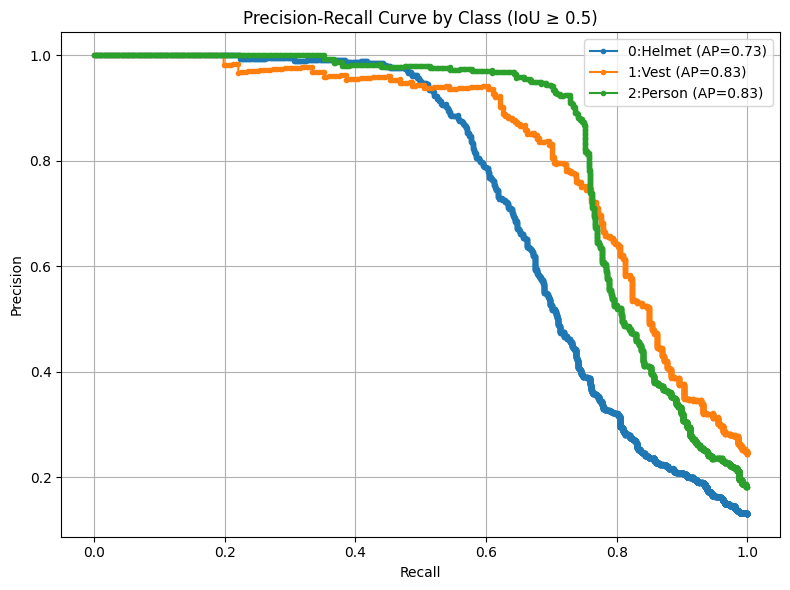

In [13]:
# 📌 필요 라이브러리 설치 (노트북 전용)
# !pip install -q ultralytics matplotlib opencv-python scikit-learn

# 📌 라이브러리 임포트
from ultralytics import YOLO
from pathlib import Path
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from collections import defaultdict

# 📌 경로 설정
MODEL_PATH = "/content/runs/detect/CHV-dataset/weights/best.pt"
IMG_DIR    = Path("/content/chv-DATASET-1/test/images")
LABEL_DIR  = Path("/content/chv-DATASET-1/test/labels")

# 📌 클래스 번호 → 이름 매핑 (실제 CHV‑dataset 클래스명으로 수정)
class_names = {
    0: "Helmet",
    1: "Vest",
    2: "Person",
    3: "Mask",
    4: "Gloves",
    5: "Boots"
}

# 📌 모델 로드
model = YOLO(MODEL_PATH)

# 📌 클래스별 스코어·레이블 저장
scores_by_class = defaultdict(list)
labels_by_class = defaultdict(list)

# 📌 inference + GT/PRED 매칭
for r in model.predict(source=str(IMG_DIR), stream=True, conf=0.001):
    img_path = Path(r.path)
    stem     = img_path.stem
    gt_file  = LABEL_DIR / f"{stem}.txt"

    # — GT 로드 —
    gt_boxes, gt_classes = [], []
    if gt_file.exists():
        h_img, w_img = cv2.imread(str(img_path)).shape[:2]
        for line in gt_file.read_text().splitlines():
            cls, x, y, w, h = map(float, line.split())
            x1 = (x - w/2) * w_img; y1 = (y - h/2) * h_img
            x2 = (x + w/2) * w_img; y2 = (y + h/2) * h_img
            gt_boxes.append([x1, y1, x2, y2])
            gt_classes.append(int(cls))
    gt_boxes   = np.array(gt_boxes)
    gt_classes = np.array(gt_classes)

    # — Pred 로드 —
    preds = r.boxes.data.cpu().numpy()  # (n,6): x1,y1,x2,y2,conf,cls
    if preds.size:
        pred_boxes = preds[:, :4]
        pred_scores = preds[:, 4]
        pred_classes = preds[:, 5].astype(int)
    else:
        pred_boxes = np.zeros((0,4))
        pred_scores = np.array([])
        pred_classes = np.array([], dtype=int)

    # — 클래스별 IoU 매칭 & 레이블 생성 —
    for score, pb, pc in zip(pred_scores, pred_boxes, pred_classes):
        mask = (gt_classes == pc)
        best_iou = 0.0
        for gb in gt_boxes[mask]:
            ix1, iy1 = max(pb[0], gb[0]), max(pb[1], gb[1])
            ix2, iy2 = min(pb[2], gb[2]), min(pb[3], gb[3])
            inter = max(0, ix2-ix1) * max(0, iy2-iy1)
            area_p = (pb[2]-pb[0])*(pb[3]-pb[1])
            area_g = (gb[2]-gb[0])*(gb[3]-gb[1])
            union = area_p + area_g - inter
            if union > 0:
                best_iou = max(best_iou, inter/union)
        labels_by_class[pc].append(1 if best_iou >= 0.5 else 0)
        scores_by_class[pc].append(score)

# 📌 한 그래프에 클래스별 PR 커브 그리기
plt.figure(figsize=(8,6))

for cls_id, name in class_names.items():
    y_true   = np.array(labels_by_class[cls_id])
    y_scores = np.array(scores_by_class[cls_id])
    if y_true.size == 0 or y_true.sum() == 0:
        continue  # GT가 전혀 없는 클래스는 스킵
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    ap = average_precision_score(y_true, y_scores)
    plt.plot(recall, precision, marker='.', label=f"{cls_id}:{name} (AP={ap:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve by Class (IoU ≥ 0.5)")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from ultralytics import YOLO
from pathlib import Path

# ✅ 모델 로드
model = YOLO("/content/runs/detect/CHV-dataset/weights/best.pt")  # YOLOv8 형식 모델

# ✅ 클래스 이름 (CHV 데이터셋 기준)
class_names = {
    0: "Helmet",
    1: "Vest",
    2: "Person",
    3: "Mask",
    4: "Gloves",
    5: "Boots"
}

# ✅ 테스트 이미지 경로
image_path = "/content/chv-DATASET-1/test/images/ppe_0001_jpg.rf.09de01d4574daed0b6b70431735c36fb.jpg"

# ✅ 이미지 원본 로드 및 복사본 생성
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# ✅ 추론 실행 (confidence 낮게 설정해 최대 탐지)
results = model.predict(source=image_path, conf=0.5, verbose=False)

# ✅ 결과 파싱
boxes = results[0].boxes  # 첫 번째 이미지에 대한 결과

if boxes is not None and boxes.data.shape[0] > 0:
    for box in boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
        conf = float(box.conf[0])
        cls_id = int(box.cls[0])
        label = class_names.get(cls_id, f"class_{cls_id}")

        # 바운딩 박스 & 라벨 그리기
        cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img_rgb, f'{label} {conf:.2f}', (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# ✅ 출력
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.axis('off')
plt.title("YOLOv8 Detection - yolo12")
plt.show()
